# Comparing 3D Animation results using Euler and Runge-Kutta


I will be using the same integrating methods with 2 different degrees of accuracy. 
First will be seeing how the algorithm work only using euler method, which is accurate to first order.
Second I will be using the same parameters, however now using the 4th Order Runge-Kutta method.

# Euler

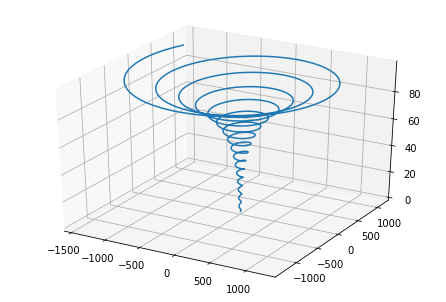

In [17]:
%matplotlib inline
#%matplotlib qt
#In order to see animation change plases of '#' between '%matplotlib inline' and '%matplotlib qt'
#In order to see an animation, remove the # infront of the '%'
"""
24/05/2020

@author: Danila Buguks
"""
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
#####################################Initial Conditions
p0=[0,7,0]
v0=[10,1,1]
B=[0,0,1]
E=[0,0,0]
q=1                   #Charge
m=1                   #mass
dt=0.1                #time interval#
######################################
stop=100
steps=int(stop/dt)

p=sp.zeros((steps,3))######Initial empty arrays
v=sp.zeros((steps,3))######Initial empty arrays
v[0]=v0###Initial velocity
p[0]=p0###Initial position

def cross(v1):
    return (q/m)*(E+sp.cross(v1,B))      #Cross product function


for i in range(0,steps-1):                              #Euler
    p1=dt*v[i]
    v1=dt*cross(v[i])


    
    p[i+1]=p[i] + (p1)
    v[i+1]=v[i] + (v1)


fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(p[:,0], p[:,1], p[:,2])  #Plots the 3D graph - Stationary
plt.show()
def func(k):  #########One of the input parameters needed for the animation.FuncAnimated which is used for iterating over the new points
    step=10*k #The step size regulates the speed of the animation, very easy to change, just increase integer to speed up and decrease to slow down
    ax.plot3D(p[:step, 0], p[:step, 1], p[:step, 2],color='g')#For each i integrates the new function

###Degfining the axis    
ax.set_xlim3d([sp.amin(p[:,0]),sp.amax(p[:,0])])
ax.set_xlabel('X')

ax.set_ylim3d([sp.amin(p[:,1]),sp.amax(p[:,1])])
ax.set_ylabel('Y')

ax.set_zlim3d([sp.amin(p[:,2]),sp.amax(p[:,2])])
ax.set_zlabel('Z')

ax.set_title('3D Motion')
lorentz_3D = animation.FuncAnimation(fig, func, frames=100, interval=20,blit=False, repeat=False) ###Actual function which takes in the arguments and plots the animation

plt.show()

We can see that using it to first order approxiamtion provides us with a whirlpool like plot. Which is not what we want, as it migh show us that our code is incorrect and something went wrong. However, lets see what changing 1st order to 4th in form or Runge-Kutta will give us.

# Runge-Kutta

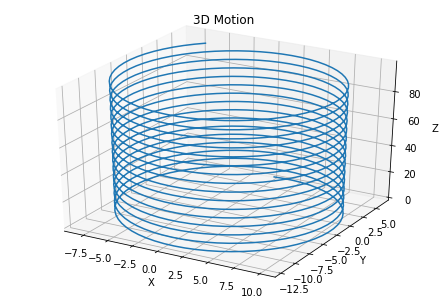

In [19]:
%matplotlib inline
#%matplotlib qt
#In order to see animation change plases of '#' between '%matplotlib inline' and '%matplotlib qt'
#In order to see an animation, remove the # infront of the '%'
"""
24/05/2020

@author: Danila
"""
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
#####################################Initial Conditions
p0=[0,7,0]
v0=[10,1,1]
B=[0,0,1]
E=[0,0,0]
q=1                   #Charge
m=1                   #mass
dt=0.1                #time interval#
######################################
stop=100
steps=int(stop/dt)

p=sp.zeros((steps,3))######Initial empty arrays
v=sp.zeros((steps,3))######Initial empty arrays
v[0]=v0###Initial velocity
p[0]=p0###Initial position

def cross(v1):
    return (q/m)*(E+sp.cross(v1,B))      #Cross product function


for i in range(0,steps-1):                              #4th Order Runge-Kutta
    p1=dt*v[i]
    v1=dt*cross(v[i])
    p2=dt*(v[i]+0.5*v1)
    v2=dt*cross(v[i]+0.5*v1)    
    p3=dt*(v[i]+0.5*v2)
    v3=dt*cross(v[i]+0.5*v2)    
    p4 = dt * (v[i] + v3)
    v4 = dt * cross(v[i] + v3)    

    
    p[i+1]=p[i] + (p1 +2*p2 +2*p3 +p4)*(1/6)
    v[i+1]=v[i] + (v1 + 2*v2+2*v3+v4)*(1/6)


fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(p[:,0], p[:,1], p[:,2])  #Plots the 3D graph - Stationary
def func(k):  #########One of the input parameters needed for the animation.FuncAnimated which is used for iterating over the new points
    step=10*k #The step size regulates the speed of the animation, very easy to change, just increase integer to speed up and decrease to slow down
    ax.plot3D(p[:step, 0], p[:step, 1], p[:step, 2],color='g')#For each i integrates the new function

###Degfining the axis    
ax.set_xlim3d([sp.amin(p[:,0]),sp.amax(p[:,0])])
ax.set_xlabel('X')

ax.set_ylim3d([sp.amin(p[:,1]),sp.amax(p[:,1])])
ax.set_ylabel('Y')

ax.set_zlim3d([sp.amin(p[:,2]),sp.amax(p[:,2])])
ax.set_zlabel('Z')

ax.set_title('3D Motion')
lorentz_3D = animation.FuncAnimation(fig, func, frames=100, interval=20,blit=False, repeat=False) ###Actual function which takes in the arguments and plots the animation

plt.show() 

Here we can clearly see that using 4th order approximation provides us with a result that we might expect, when thinking of a magnetic field in the z direction, hence seeing the drastic changes that happen when only approximationg to first order, using Euler. Hence in this case the 4th order Runge-Kutta is much more suitable and should be used from now on.